In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [19]:
sp500 = pd.read_csv("sp500.csv", index_col=0)
sp500.index = pd.to_datetime(sp500.index, format="%Y-%m-%d")
sp500.head(5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1950-01-03,16.66,16.66,16.66,16.66,1260000,0,0
1950-01-04,16.85,16.85,16.85,16.85,1890000,0,0
1950-01-05,16.93,16.93,16.93,16.93,2550000,0,0
1950-01-06,16.98,16.98,16.98,16.98,2010000,0,0
1950-01-09,17.08,17.08,17.08,17.08,2520000,0,0


<Axes: xlabel='Date'>

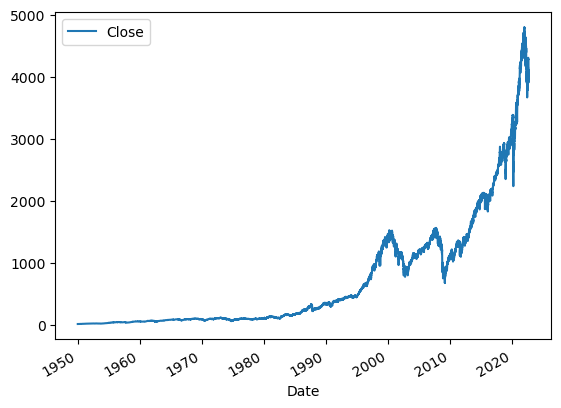

In [20]:
sp500.plot.line(y="Close", use_index=True)

In [21]:
sp500.drop(["Dividends", "Stock Splits"], axis=1, inplace=True)
sp500.head(5)

,Open,High,Low,Close,Volume
Date,,,,,
1950-01-03,16.66,16.66,16.66,16.66,1260000
1950-01-04,16.85,16.85,16.85,16.85,1890000
1950-01-05,16.93,16.93,16.93,16.93,2550000
1950-01-06,16.98,16.98,16.98,16.98,2010000
1950-01-09,17.08,17.08,17.08,17.08,2520000


In [22]:
sp500['Target'] = (sp500["Close"].shift(-1) > sp500["Close"]).astype(int)
sp500.sample(5)

,Open,High,Low,Close,Volume,Target
Date,,,,,,
1966-11-11,0.000000,82.360001,81.269997,81.940002,6690000,0
1986-10-27,238.220001,238.770004,236.720001,238.770004,133200000,1
2020-05-15,2829.949951,2865.010010,2816.780029,2863.699951,5477040000,1
1953-11-09,24.660000,24.660000,24.660000,24.660000,1440000,0
2014-01-06,1832.310059,1837.160034,1823.729980,1826.770020,3294850000,1


In [23]:
sp500['Open'].replace(0, pd.NaT, inplace=True)
sp500['Open'].fillna(sp500['Close'].shift(), inplace=True)

sp500["Open Close Ratio"] = sp500["Close"]/sp500["Open"]
sp500["Close Open Ratio"] = sp500["Close"].shift(1)/sp500["Open"]
sp500["Price Range"] = sp500["High"] - sp500["Low"]
sp500["Price Change"] = sp500["Close"] - sp500["Open"] 
sp500["Daily Returns"] = sp500["Close"].pct_change()
sp500["Volume Change"] = sp500["Volume"].pct_change()
sp500["Volume Weighted Average Price"] = (sp500['Close'] * sp500['Volume']).cumsum() / sp500['Volume'].cumsum()


sp500.head(5)

,Open,High,Low,Close,Volume,Target,Open Close Ratio,Close Open Ratio,Price Range,Price Change,Daily Returns,Volume Change,Volume Weighted Average Price
Date,,,,,,,,,,,,,
1950-01-03,16.66,16.66,16.66,16.66,1260000,1,1.0,NaN,0.0,0.0,NaN,NaN,16.660000
1950-01-04,16.85,16.85,16.85,16.85,1890000,1,1.0,0.988724,0.0,0.0,0.011405,0.500000,16.774000
1950-01-05,16.93,16.93,16.93,16.93,2550000,1,1.0,0.995275,0.0,0.0,0.004748,0.349206,16.843790
1950-01-06,16.98,16.98,16.98,16.98,2010000,1,1.0,0.997055,0.0,0.0,0.002953,-0.211765,16.879300
1950-01-09,17.08,17.08,17.08,17.08,2520000,0,1.0,0.994145,0.0,0.0,0.005889,0.253731,16.928739


In [24]:
horizons = [2,5,60,250,1000]

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]

    volume_column = f"Volume_Ratio_{horizon}"
    sp500[volume_column] = sp500["Volume"] / rolling_averages["Volume"]
    
    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]

sp500.head(5)

,Open,High,Low,Close,Volume,Target,Open Close Ratio,Close Open Ratio,Price Range,Price Change,...,Trend_5,Close_Ratio_60,Volume_Ratio_60,Trend_60,Close_Ratio_250,Volume_Ratio_250,Trend_250,Close_Ratio_1000,Volume_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,,,,,
1950-01-03,16.66,16.66,16.66,16.66,1260000,1,1.0,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1950-01-04,16.85,16.85,16.85,16.85,1890000,1,1.0,0.988724,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1950-01-05,16.93,16.93,16.93,16.93,2550000,1,1.0,0.995275,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1950-01-06,16.98,16.98,16.98,16.98,2010000,1,1.0,0.997055,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1950-01-09,17.08,17.08,17.08,17.08,2520000,0,1.0,0.994145,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
sp500 = sp500.loc["1990-01-01":].copy()
sp500.dropna

sp500 = sp500.replace([np.inf, -np.inf], np.nan).dropna()

sp500.head(5)

,Open,High,Low,Close,Volume,Target,Open Close Ratio,Close Open Ratio,Price Range,Price Change,...,Trend_5,Close_Ratio_60,Volume_Ratio_60,Trend_60,Close_Ratio_250,Volume_Ratio_250,Trend_250,Close_Ratio_1000,Volume_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,,,,,
1990-01-02,353.399994,359.690002,351.980011,359.690002,162070000,0,1.017799,1.0,7.709991,6.290009,...,4.0,1.042631,0.998595,34.0,1.111061,0.978555,149.0,1.289445,0.984391,568.0
1990-01-03,359.690002,360.589996,357.890015,358.760010,192330000,0,0.997414,1.0,2.699982,-0.929993,...,4.0,1.039936,1.182636,33.0,1.107120,1.160392,148.0,1.285414,1.167427,568.0
1990-01-04,358.760010,358.760010,352.890015,355.670013,177000000,0,0.991387,1.0,5.869995,-3.089996,...,3.0,1.031185,1.078405,32.0,1.096573,1.067545,147.0,1.273659,1.074058,568.0
1990-01-05,355.670013,355.670013,351.350006,352.200012,158530000,1,0.990244,1.0,4.320007,-3.470001,...,2.0,1.021467,0.964798,32.0,1.084914,0.955729,147.0,1.260562,0.961820,568.0
1990-01-08,352.200012,354.239990,350.540009,353.790009,140110000,0,1.004514,1.0,3.699982,1.589996,...,2.0,1.026237,0.854773,33.0,1.088849,0.844860,147.0,1.265575,0.850013,568.0


In [26]:
X = sp500.drop("Target", axis=1)
y = sp500.Target

print(X.shape)
print(y.shape)

(8235, 27)
(8235,)
